# RandomizedSearchCV

In [1]:
import pickle

import humanize
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.externals.joblib import parallel_backend
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split


%matplotlib inline
%load_ext autoreload

In [2]:
X_train = pickle.load(open('./data/stage6-train.pkl', 'rb'))
y_train = X_train.pop('stop_outcome')
X_test = pickle.load(open('./data/stage6-test.pkl', 'rb'))
y_test = X_test.pop('stop_outcome')

print('Row counts:\n\ttrain: {}\n\ttest: {}'.format(X_train.shape[0], X_test.shape[0]))


Row counts:
	train: 250120
	test: 62530


In [3]:
from sklearn.externals.joblib import parallel_backend
from sklearn.model_selection import RandomizedSearchCV, train_test_split


params = {
    'criterion': ['friedman_mse', 'mse', 'mae'],
#     'loss': ['deviance'],
#     'learning_rate': [0.0983, 0.1],
    'learning_rate': [0.09, 0.1],
    'max_depth': [5, 6, 7],
    'max_features': [None, len(list(X_train.columns.values))],
    'subsample': [0.85, 0.9, 0.85],
#     'verbose': [3],
#     'random_state': [0],

}

gbc = GradientBoostingClassifier(verbose=3, random_state=0)
clf = RandomizedSearchCV(gbc, params, scoring='accuracy', cv=5, verbose=3, n_iter=1)

with parallel_backend('threading'):
    clf.fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] subsample=0.85, max_features=219, max_depth=5, learning_rate=0.1, criterion=mse 
[CV] subsample=0.85, max_features=219, max_depth=5, learning_rate=0.1, criterion=mse [CV] subsample=0.85, max_features=219, max_depth=5, learning_rate=0.1, criterion=mse [CV] subsample=0.85, max_features=219, max_depth=5, learning_rate=0.1, criterion=mse [CV] subsample=0.85, max_features=219, max_depth=5, learning_rate=0.1, criterion=mse 



      Iter       Train Loss      OOB Improve   Remaining Time 
      Iter       Train Loss      OOB Improve   Remaining Time 
      Iter       Train Loss      OOB Improve   Remaining Time 
      Iter       Train Loss      OOB Improve   Remaining Time 
      Iter       Train Loss      OOB Improve   Remaining Time 
         1      207878.1076        2937.3215           21.88m
         1      207869.0921        2979.9750           22.47m
         1      207806.5613        2988.8004           24.44m
         1

        25      131260.9456          70.5429           19.10m
        25      131790.2712          64.3585           19.25m
        25      130470.2446          64.5351           19.32m
        25      129974.8874          89.5361           19.29m
        25      132375.3434          73.2803           19.38m
        26      130602.9984          59.8059           18.81m
        26      129366.0704          59.0256           19.11m
        26      131661.7097          66.7616           19.13m
        26      131685.4927          64.5620           19.16m
        26      130089.2476          74.3051           19.27m
        27      130267.0428          68.5756           18.65m
        27      131391.8165          59.5905           18.91m
        27      131217.4754          55.8546           18.94m
        27      129094.5699          59.0073           19.00m
        27      129593.4575          58.0785           19.07m
        28      129878.9578          48.9681           18.39m
        

        50      123667.3811           8.4860           13.44m
        51      126021.9229           9.3638           12.98m
        52      124937.1768           8.3417           12.51m
        53      126414.2124           7.7585           12.11m
        52      124701.3279           9.4575           12.64m
        51      123329.1813          13.7334           13.17m
        53      124717.9898          44.7235           12.22m
        52      126148.9134           7.4453           12.73m
        54      126261.4459           7.9316           11.83m
        53      124134.1676           6.1708           12.36m
        54      124260.5620           7.3272           11.93m
        52      123481.1744           8.5537           12.92m
        53      125923.3455           6.3120           12.44m
        55      126236.4401          11.7172           11.58m
        54      124376.8744           6.1632           12.09m
        55      124001.3543           7.3796           11.69m
        

        79      122026.0854           2.3248            5.25m
        77      122299.6946           0.7860            5.90m
        81      123759.9217           1.9628            4.65m
        76      123943.2189           5.9327            6.27m
        78      120852.2469           0.5406            5.61m
        80      121870.9571           0.7163            4.98m
        78      122140.7951           3.6820            5.64m
        82      123710.6754           3.4192            4.39m
        77      123547.9178           1.5327            6.01m
        79      120557.0464           3.3758            5.35m
        81      121729.7212           0.1867            4.73m
        83      123457.7405           3.0262            4.14m
        79      121883.1487           0.9690            5.38m
        80      120607.3767           1.2562            5.08m
        78      123501.3892           3.5924            5.74m
        82      121469.6202           3.7054            4.48m
        

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 24.3min remaining: 36.5min


        98      119204.8673          -0.3653           29.67s
        97      120454.8527           0.6704           45.04s
        97      122649.9935           1.5442           45.05s
        99      119376.0769          -1.7122           14.76s
        98      120710.5844          -0.5303           29.87s
        98      122225.9260          -0.1993           29.88s
        99      120561.4348          -0.7700           14.85s
        99      122276.3991           1.6159           14.85s
       100      118931.5327           9.8559            0.00s
[CV]  subsample=0.85, max_features=219, max_depth=5, learning_rate=0.1, criterion=mse, score=0.4258156085079162, total=24.6min
       100      120280.0149           0.7943            0.00s
[CV]  subsample=0.85, max_features=219, max_depth=5, learning_rate=0.1, criterion=mse, score=0.6805533343994883, total=24.7min
       100      122380.6869           0.4769            0.00s
[CV]  subsample=0.85, max_features=219, max_depth=5, learning_ra

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 24.9min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1      259877.0596        3681.6961           16.08m
         2      243628.3064        2860.3215           16.09m
         3      230783.2506        2275.3221           15.75m
         4      220268.2554        1823.9603           15.59m
         5      211760.4000        1486.9702           15.30m
         6      204936.0137        1223.2421           15.09m
         7      199132.1452        1015.3677           15.01m
         8      194382.8840         848.8493           14.74m
         9      189852.2246         711.5909           14.67m
        10      186474.8949         593.5842           14.65m
        11      183439.4333         532.2967           14.47m
        12      181201.3566         445.9496           14.27m
        13      178814.0952         377.4467           14.06m
        14      176667.5666         329.7077           13.92m
        15      175012.7039         287.4436           13.88m
       

In [4]:
print(clf.score(X_test, y_test))

0.728882136574


In [5]:
clf.best_estimator_

GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.1,
              loss='deviance', max_depth=5, max_features=219,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=0.85, verbose=3, warm_start=False)

In [6]:
clf.cv_results_

/home/pato/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/pato/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/pato/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/pat

{'mean_fit_time': array([ 1464.13193541]),
 'mean_score_time': array([ 0.92445889]),
 'mean_test_score': array([ 0.62497201]),
 'mean_train_score': array([ 0.75491662]),
 'param_criterion': masked_array(data = ['mse'],
              mask = [False],
        fill_value = ?),
 'param_learning_rate': masked_array(data = [0.1],
              mask = [False],
        fill_value = ?),
 'param_max_depth': masked_array(data = [5],
              mask = [False],
        fill_value = ?),
 'param_max_features': masked_array(data = [219],
              mask = [False],
        fill_value = ?),
 'param_subsample': masked_array(data = [0.85],
              mask = [False],
        fill_value = ?),
 'params': [{'criterion': 'mse',
   'learning_rate': 0.1,
   'max_depth': 5,
   'max_features': 219,
   'subsample': 0.85}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([ 0.73545756]),
 'split0_train_score': array([ 0.74983258]),
 'split1_test_score': array([ 0.71456272]),
 'split1_

In [7]:
clf.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 219,
 'subsample': 0.85}

In [8]:
clf.best_score_

0.62497201343355191

## Optimal parameters with Stage 6 data

In [3]:
gbc = GradientBoostingClassifier(criterion='mse', learning_rate=0.1, max_depth=5, max_features=219,
                                 subsample=0.85, verbose=3, random_state=0)
gbc.fit(X_train, y_train)
print('{}'.format(gbc.score(X_test, y_test)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1      259877.0596        3681.6961           14.99m
         2      243628.3064        2860.3215           15.02m
         3      230783.2506        2275.3221           14.79m
         4      220268.2554        1823.9603           14.78m
         5      211760.4000        1486.9702           14.66m
         6      204936.0137        1223.2421           14.40m
         7      199132.1452        1015.3677           14.40m
         8      194382.8840         848.8493           14.18m
         9      189852.2246         711.5909           14.17m
        10      186474.8949         593.5842           14.17m
        11      183439.4333         532.2967           14.06m
        12      181201.3566         445.9496           13.90m
        13      178814.0952         377.4467           13.73m
        14      176667.5666         329.7077           13.54m
        15      175012.7039         287.4436           13.49m
       

In [6]:
from sklearn.metrics import classification_report

clf_report = classification_report(y_test, gbc.predict(X_test), target_names=['Arrest', 'Summons', 'Ticket',
                                                                              'Verbal Warning', 'Written Warning'])
print(clf_report)

                 precision    recall  f1-score   support

         Arrest       0.53      0.36      0.43      1408
        Summons       0.66      0.27      0.38      2657
         Ticket       0.76      0.96      0.85     43224
 Verbal Warning       0.49      0.26      0.34      8743
Written Warning       0.58      0.12      0.20      6498

    avg / total       0.69      0.73      0.68     62530



## Comparison against other stages

In [3]:
# Test model against other stage test sets
for i in range(1, 8):
    if i == 6:
        continue
    print('Stage {}:'.format(i))
    with open('./data/stage{}-train.pkl'.format(i), 'rb') as ftrain:
        X_train = pickle.load(ftrain)
        y_train = X_train.pop('stop_outcome')
        with open('./data/stage{}-test.pkl'.format(i), 'rb') as ftest:
            X_test = pickle.load(ftest)
            y_test = X_test.pop('stop_outcome')
            gbc = GradientBoostingClassifier(criterion='mse', learning_rate=0.1, max_depth=5,
                                             max_features=X_train.columns.values.shape[0], subsample=0.85,
                                             verbose=3, random_state=0)
            gbc.fit(X_train, y_train)
            print('stage {}: {}'.format(i, gbc.score(X_test, y_test)))

Stage 1:
      Iter       Train Loss      OOB Improve   Remaining Time 
         1      260150.4974        3640.4853            4.06m
         2      244207.2398        2849.4365            4.04m
         3      231167.1396        2236.9900            4.03m
         4      221023.9044        1816.6583            3.98m
         5      212572.7266        1469.7807            3.95m
         6      205823.0086        1202.1373            3.88m
         7      200032.6123         991.1782            3.83m
         8      195291.8255         820.9246            3.80m
         9      191250.9904         695.6237            3.77m
        10      187873.7384         582.1326            3.76m
        11      185143.0292         489.8997            3.74m
        12      182707.0548         432.7195            3.72m
        13      180733.2744         358.9886            3.67m
        14      178834.0952         317.7685            3.64m
        15      177112.8396         264.3266            3.60

        31      162651.6885          46.2085           11.03m
        32      161937.4980          44.1212           10.82m
        33      161696.2806          41.8545           10.63m
        34      161624.5975          39.5745           10.43m
        35      161233.1431          30.7241           10.22m
        36      160999.7758          41.9000           10.03m
        37      160768.6611          31.0172            9.85m
        38      160577.4196          31.1709            9.66m
        39      160461.8050          22.0131            9.49m
        40      159684.1772          20.8480            9.30m
        41      159774.3044          22.3677            9.11m
        42      159951.9903          22.0196            8.93m
        43      159280.2664          14.3319            8.74m
        44      159125.4297          18.4275            8.58m
        45      159160.2310          19.3984            8.43m
        46      159052.7927          17.3781            8.26m
        

        62      157817.0018          15.8444            1.32m
        63      157829.9779          13.7327            1.29m
        64      157734.1803           8.4775            1.25m
        65      157760.0830          16.0029            1.22m
        66      157539.2611          11.1498            1.18m
        67      157037.7869          24.9820            1.15m
        68      157007.0942           4.1191            1.11m
        69      157003.5625          11.8693            1.08m
        70      156532.3365           7.7500            1.04m
        71      156657.7230           6.6248            1.01m
        72      156481.1265           9.9868           58.19s
        73      156472.4517          11.6450           56.11s
        74      156409.4941          11.5859           54.04s
        75      156277.8755           7.4734           51.92s
        76      156125.9265           8.8934           49.86s
        77      156086.3549           2.5482           47.78s
        

        93      253390.3753          27.7840           21.93s
        94      253127.0060          28.7590           18.81s
        95      253278.3873          12.8418           15.67s
        96      252922.5937          13.9353           12.55s
        97      253221.1126           8.2895            9.42s
        98      252699.7726          15.3596            6.28s
        99      252634.8926           9.1583            3.14s
       100      252370.8124          19.0865            0.00s
stage 4: 0.7090542744746857
Stage 5:
      Iter       Train Loss      OOB Improve   Remaining Time 
         1      259025.3294        3609.1022            3.17m
         2      243154.4236        2779.3629            3.17m
         3      230605.3140        2208.2835            3.13m
         4      220331.4866        1788.0763            3.11m
         5      212011.8174        1462.9877            3.08m
         6      205069.1404        1198.5737            3.04m
         7      199518.6593     

        22      169126.2437         154.8284            2.57m
        23      168583.7932         124.6246            2.54m
        24      167668.8186         119.6037            2.52m
        25      167143.2222         106.4544            2.49m
        26      166683.9643          78.9303            2.46m
        27      166076.2753          92.6175            2.42m
        28      165514.6066          64.9475            2.39m
        29      165246.4616          58.1935            2.36m
        30      164735.0308          74.4801            2.33m
        31      164306.6895          69.4609            2.29m
        32      163653.3621          61.1924            2.26m
        33      163441.5995          47.7971            2.23m
        34      163306.6831          32.2378            2.19m
        35      162913.4514          52.1031            2.16m
        36      162904.5780          37.2692            2.12m
        37      162531.7841          35.1588            2.09m
        

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    0.62  0.38]
 [ 0.    0.    1.  ]]


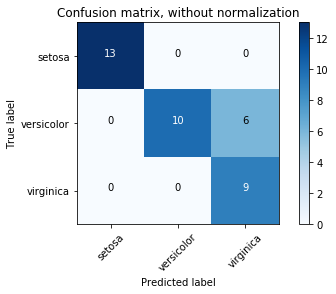

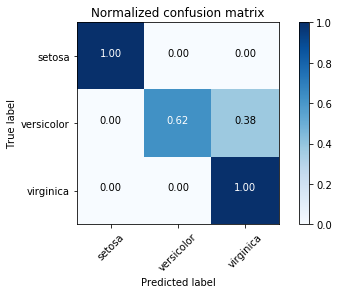

In [8]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
